In [28]:
#importing the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

#Get the dataset
df = pd.read_csv(r'data/2D Dataset.csv',encoding='latin-1')

In [29]:
del df["Unnamed: 10"]
del df["Unnamed: 11"]
del df["Unnamed: 12"]
del df["Unnamed: 13"]

In [30]:
df.head()

,Countries (Indexes),GDP per capita (X1),Population Density/km2 (X2),Vaccination rate per 100 (X3),Doctor population per 1000 (X4),Hospital beds per 1000 (X5),Life Expentancy (X6),Average Temperature (X7),Active Cases (X8),Deaths over X-period (Y)
0,Argentina,9929.15,16,126.62,3.91,5.00,77.3,14.0,5180097,72772
1,Australia,62618.59,3,132.77,3.68,2.89,83.2,22.0,178499,906
2,Bangladesh,2138.79,1127,36.17,0.47,0.80,72.6,25.0,1542944,20315
3,Belgium,50412.71,381,144.55,3.01,5.64,77.2,10.0,1388332,6550
4,Botswana,7349.88,4,33.33,0.53,1.80,64.3,20.6,190528,2365


In [31]:
# describe type of data
# convert Vaccination rate per 100 (X3) to float
df['Vaccination rate per 100 (X3)'] = df['Vaccination rate per 100 (X3)'].astype(float)

# Data Visualisation

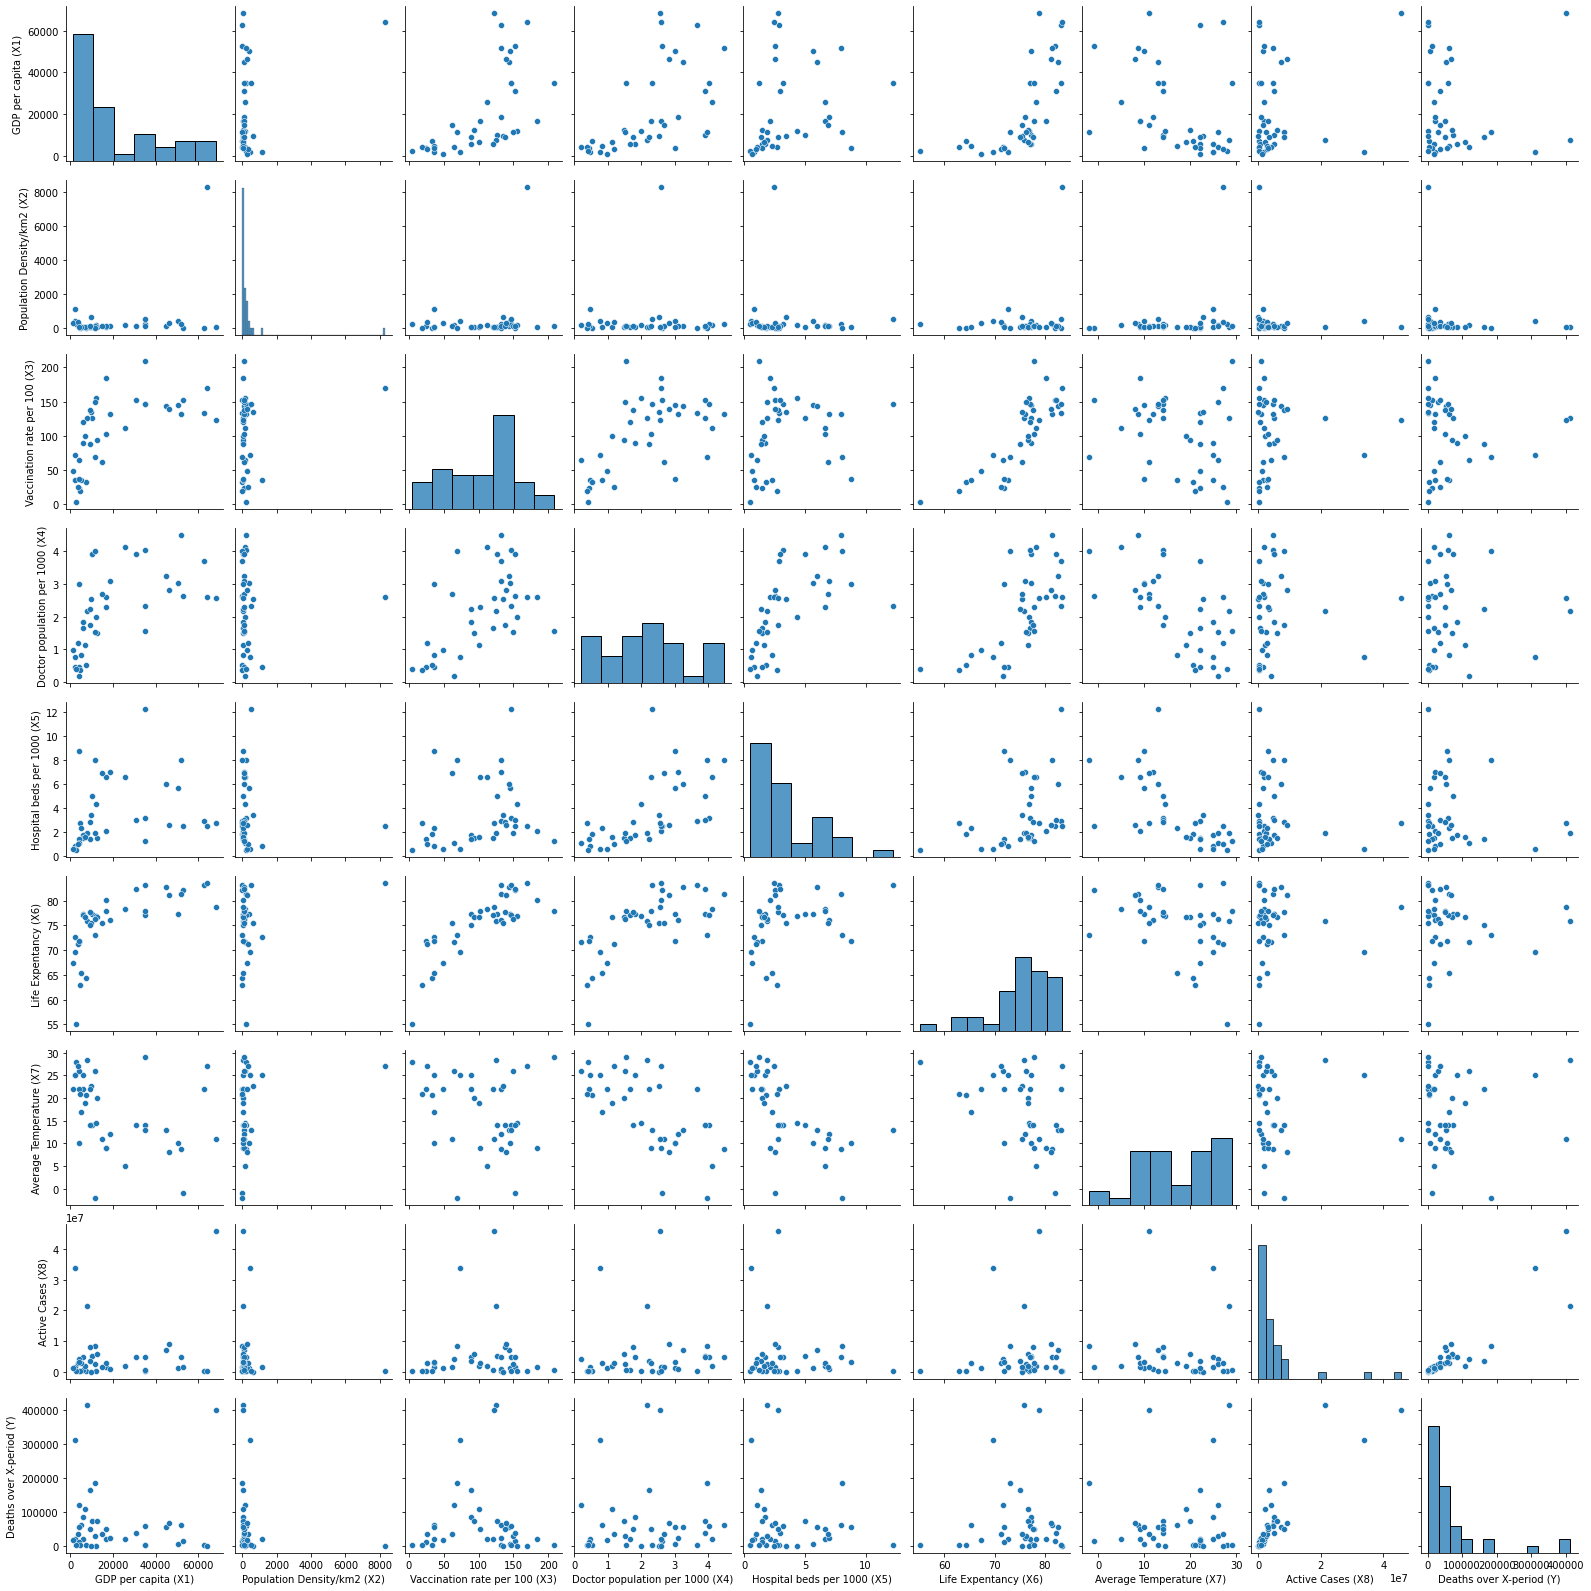

In [32]:
pp = sns.pairplot(data=df)

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
# Further viz with q-q plot to visualize the distribution of the data

### Plotting Scatter Plots

In [33]:
df.columns

Index(['Countries (Indexes)', 'GDP per capita (X1)',
       'Population Density/km2 (X2)', 'Vaccination rate per 100 (X3)',
       'Doctor population per 1000 (X4)', 'Hospital beds per 1000 (X5)',
       'Life Expentancy (X6)', 'Average Temperature (X7)', 'Active Cases (X8)',
       'Deaths over X-period (Y)'],
      dtype='object')

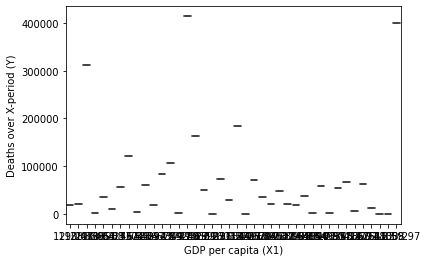

In [34]:
myplot = sns.boxplot(x='GDP per capita (X1)', y='Deaths over X-period (Y)', data=df)

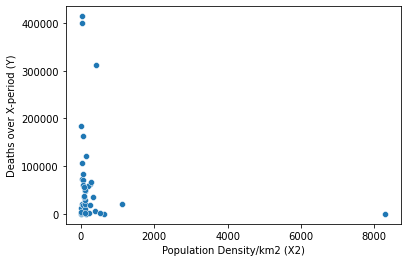

In [35]:
myplot = sns.scatterplot(x='Population Density/km2 (X2)', y='Deaths over X-period (Y)', data=df)

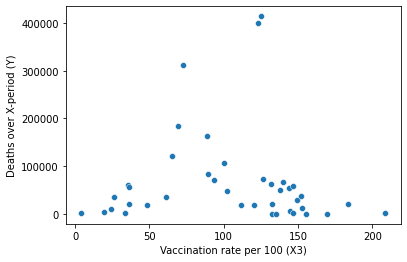

In [36]:
myplot3 = sns.scatterplot(x='Vaccination rate per 100 (X3)', y='Deaths over X-period (Y)', data=df)

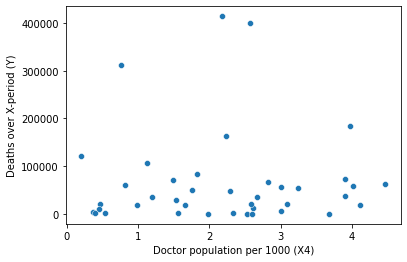

In [37]:
myplot4 = sns.scatterplot(x='Doctor population per 1000 (X4)', y='Deaths over X-period (Y)', data=df)


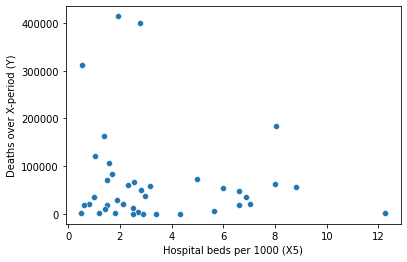

In [38]:
myplot5 = sns.scatterplot(x='Hospital beds per 1000 (X5)', y='Deaths over X-period (Y)', data=df)


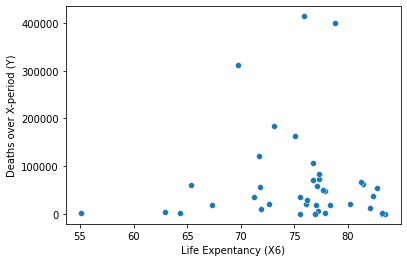

In [39]:
myplot6 = sns.scatterplot(x='Life Expentancy (X6)', y='Deaths over X-period (Y)', data=df)


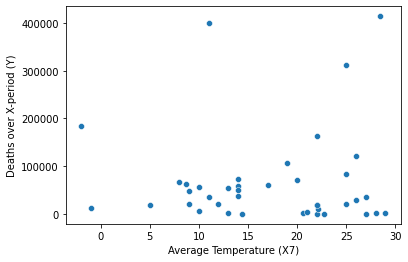

In [40]:
myplot7 = sns.scatterplot(x='Average Temperature (X7)', y='Deaths over X-period (Y)', data=df)


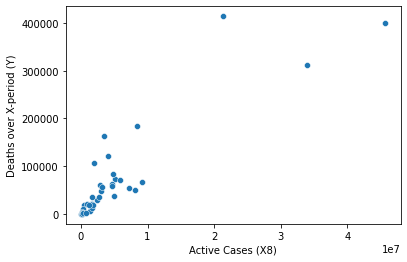

In [41]:
myplot8 = sns.scatterplot(x='Active Cases (X8)', y='Deaths over X-period (Y)', data=df)

# Modelling

In [42]:
def normalize_z(dfin):
   
    dfout = (dfin - dfin.mean(axis=0))/dfin.std(axis=0)

    return dfout

def normalize_minmax(dfin):

    dfout = (dfin - dfin.min(axis=0))/(dfin.max(axis=0)-dfin.min(axis=0))
            
    return dfout


def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:,feature_names]
    df_target = df.loc[:,target_names]
    
    return df_feature, df_target

def prepare_feature(df_feature):
    n = df_feature.shape[0]
    ones = np.ones(n).reshape(n,1)

    return np.concatenate((ones,df_feature.to_numpy()),axis = 1)

def prepare_target(df_feature):
    return df_feature.to_numpy()

def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    X = prepare_feature(df_feature)

    return predict_norm(X, beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)


def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    np.random.seed(random_state)
    TestSize = int(test_size*len(df_feature))
    testchoice = np.random.choice(len(df_feature),size = TestSize, replace = False)
    remainder = []
    for i in df_feature.index:
        if i not in testchoice:
            remainder.append(i)
    trainchoice = np.random.choice(remainder, size = len(remainder),replace = False)
        
    df_feature_train = df_feature.iloc[trainchoice]
    df_target_train = df_target.iloc[trainchoice]
    df_feature_test = df_feature.iloc[testchoice]
    df_target_test = df_target.iloc[testchoice]
    
    
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  
def r2_score(y, ypred):
    rss = np.sum((ypred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    
    return r2

def mean_squared_error(target, pred):
    n = target.shape[0]
    error = target-pred
    mse = np.matmul(error.T,error)/n
    
    return mse

def adjusted_r2_score(y, ypred):
    # The reason for this is that the r2 score is not adjusted for the number of observations
    # Since R2 always increases as you add more predictors to a model, adjusted R2 can serve as a metric that tells you how useful a model is, adjusted for the number of predictors in a model.
    # The adjusted R2 score is calculated as 1 - (1-r2)*(n-1)/(n-p-1)
    r2 = r2_score(y,ypred)
    n = y.shape[0]
    k = y.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
    
    return adj_r2

def evaluate_model(y, ypred):
    r2 = r2_score(y, ypred)
    adjusted_r2 = adjusted_r2_score(y, ypred)
    mse = mean_squared_error(y, ypred)



    print(f"mse : {mse}\n")
    print(f"r2 : {r2}")
    print(f"adjusted r2 : {adjusted_r2}")


In [43]:
def compute_cost(X, y, beta):
    m = X.shape[0]
    y_pred = np.matmul(X,beta)
    error = y_pred - y
    
    # Matrix multiplcation does both sum and square
    J = (1/(2*m))*np.matmul(error.T,error)
    
    return J[0][0] # Extract a scalar value from the 1 x 1 matrix



def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros(num_iters)
    
    for i in range(num_iters):
        yp = np.matmul(X,beta)
        error = yp - y
        beta = beta - (alpha/m) * np.matmul(X.T,error)
#         beta = beta - (alpha/m)*np.matmul(X.T,np.matmul(X,beta)-y)
        cost = compute_cost(X,y,beta)
#         print(cost)
        J_storage[i] = cost
#         print(J_storage[i])
    
    
    return beta, J_storage

Using all features as benchmark

In [44]:
feature_column = ['GDP per capita (X1)',
       'Population Density/km2 (X2)', 'Vaccination rate per 100 (X3)',
       'Doctor population per 1000 (X4)', 'Hospital beds per 1000 (X5)',
       'Life Expentancy (X6)', 'Average Temperature (X7)', 'Active Cases (X8)']

# get features and targets from data frame
df_feature, df_target = get_features_targets(df,feature_column,["Deaths over X-period (Y)"])

# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.25)

# normalize the feature using z normalization
# df_feature_train_z = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train) # concatenating for the y intercept
target = prepare_target(df_target_train)

iterations = 1000
alpha = 0.0001

num_rows = X.shape[0] #Number of Rows
num_cols = X.shape[1] #Number of Columns 
beta = np.random.randn(num_cols,1) / np.sqrt(num_rows) #Weight Initialization

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
df_feature_test_z = normalize_z(df_feature_test)
pred = predict(df_feature_test_z,beta)
print(beta)

evaluate_model(df_target_test, pred)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
mse :                            0
Deaths over X-period (Y) NaN

r2 : Deaths over X-period (Y)    1.0
dtype: float64
adjusted r2 : Deaths over X-period (Y)    1.0
dtype: float64


/tmp/ipykernel_6476/757766178.py:7: RuntimeWarning: overflow encountered in matmul
  J = (1/(2*m))*np.matmul(error.T,error)
/tmp/ipykernel_6476/757766178.py:20: RuntimeWarning: overflow encountered in matmul
  beta = beta - (alpha/m) * np.matmul(X.T,error)
/tmp/ipykernel_6476/757766178.py:20: RuntimeWarning: invalid value encountered in matmul
  beta = beta - (alpha/m) * np.matmul(X.T,error)
/tmp/ipykernel_6476/757766178.py:20: RuntimeWarning: invalid value encountered in subtract
  beta = beta - (alpha/m) * np.matmul(X.T,error)
/tmp/ipykernel_6476/96265623.py:68: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2

All features + normalize

In [53]:
feature_column = ['GDP per capita (X1)',
       'Population Density/km2 (X2)', 'Vaccination rate per 100 (X3)',
       'Doctor population per 1000 (X4)', 'Hospital beds per 1000 (X5)',
       'Life Expentancy (X6)', 'Average Temperature (X7)', 'Active Cases (X8)']

# get features and targets from data frame
df_feature, df_target = get_features_targets(df,feature_column,["Deaths over X-period (Y)"])

# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.25)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train_z) # concatenating for the y intercept
target = prepare_target(df_target_train)

iterations = 1000000
alpha = 0.0001

num_rows = X.shape[0] #Number of Rows
num_cols = X.shape[1] #Number of Columns 
beta = np.random.randn(num_cols,1) / np.sqrt(num_rows) #Weight Initialization

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
df_feature_test_z = normalize_z(df_feature_test)
pred = predict(df_feature_test_z,beta)
print(beta)

evaluate_model(df_target_test, pred)

[[ 66310.19999993]
 [-39590.91843292]
 [   965.76963826]
 [   290.76064268]
 [ 43950.35441945]
 [ -2003.47606635]
 [  3434.75248617]
 [ 25798.67922618]
 [ 73287.69433581]]
mse :                                      0
Deaths over X-period (Y)  7.158482e+09

r2 : Deaths over X-period (Y)    0.430483
dtype: float64
adjusted r2 : Deaths over X-period (Y)    0.359294
dtype: float64


/tmp/ipykernel_6476/96265623.py:68: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  mse = np.matmul(error.T,error)/n


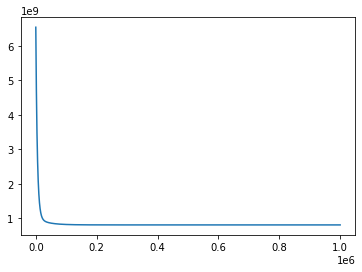

In [54]:
plt.plot(J_storage)

### Normalising Data

### Using polynomial Features for transformation

In [55]:
def poly_features(df_feature, colname, colname_transformed, degree=2):
    col = df_feature[colname]
    df_feature[colname_transformed] = np.power(col, degree)
    return df_feature

#### Normalizing Test + Train + Poly features

In [79]:
# Extract feature and target

feature_column = ['GDP per capita (X1)',
       'Population Density/km2 (X2)', 'Vaccination rate per 100 (X3)',
       'Doctor population per 1000 (X4)', 'Hospital beds per 1000 (X5)',
       'Life Expentancy (X6)', 'Average Temperature (X7)', 'Active Cases (X8)']

# get features and targets from data frame
df_feature, df_target = get_features_targets(df,feature_column,["Deaths over X-period (Y)"])
df_features = poly_features(df_feature, 'Life Expentancy (X6)', 'Life Expentancy (X6)',3)
# df_features = poly_features(df_feature, 'Average Temperature (X7)', 'Average Temperature (X7)',2)



# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.25)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train_z) # concatenating for the y intercept
target = prepare_target(df_target_train)

iterations = 100000
alpha = 0.0001

num_rows = X.shape[0] #Number of Rows
num_cols = X.shape[1] #Number of Columns 
beta = np.random.randn(num_cols,1) / np.sqrt(num_rows) #Weight Initialization

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
df_feature_test_z = normalize_z(df_feature_test)
pred = predict(df_feature_test_z,beta)
print(beta)

evaluate_model(df_target_test, pred)

[[ 66307.19103795]
 [-10939.1560818 ]
 [ -9606.02656786]
 [ 19181.6842927 ]
 [  2639.55468982]
 [  -561.42443853]
 [ 24269.54959276]
 [ 77235.29358122]]
mse :                                      0
Deaths over X-period (Y)  1.913079e+09

r2 : Deaths over X-period (Y)    0.847799
dtype: float64
adjusted r2 : Deaths over X-period (Y)    0.828774
dtype: float64


/tmp/ipykernel_6476/96265623.py:68: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  mse = np.matmul(error.T,error)/n


In [93]:
y = predict(df_feature,beta)

# Stats mod
results = sm.OLS(y, df_target).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              261.1
Date:                Sun, 21 Nov 2021   Prob (F-statistic):                    7.11e-19
Time:                        13:04:12   Log-Likelihood:                         -478.13
No. Observations:                  40   AIC:                                      958.3
Df Residuals:                      39   BIC:                                      960.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Deaths over X-period (Y)     0.8169      0.051     16.158      0.000       0.715       0.919
==============================================================================
Omnibus:                       14.351   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.631
Skew:                          -1.164   Prob(JB):                     0.000245
Kurtosis:                       5.135   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

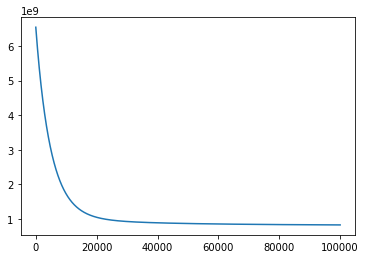

In [64]:
plt.plot(J_storage)

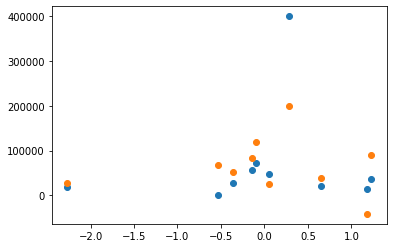

In [67]:
plt.scatter(df_feature_test_z["Life Expentancy (X6)"], df_target_test)
plt.scatter(df_feature_test_z["Life Expentancy (X6)"], pred)

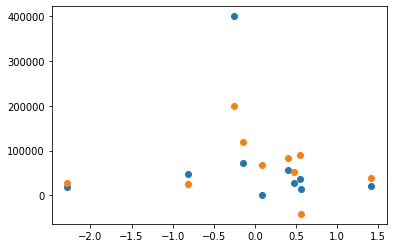

In [69]:
plt.scatter(df_feature_test_z["Vaccination rate per 100 (X3)"], df_target_test)
plt.scatter(df_feature_test_z["Vaccination rate per 100 (X3)"], pred)

### Further Experiments

In [70]:
df.columns

Index(['Countries (Indexes)', 'GDP per capita (X1)',
       'Population Density/km2 (X2)', 'Vaccination rate per 100 (X3)',
       'Doctor population per 1000 (X4)', 'Hospital beds per 1000 (X5)',
       'Life Expentancy (X6)', 'Average Temperature (X7)', 'Active Cases (X8)',
       'Deaths over X-period (Y)'],
      dtype='object')

Transforming every feature to polynomial

In [71]:
# Extract feature and target

feature_column = ['GDP per capita (X1)',
       'Population Density/km2 (X2)', 'Vaccination rate per 100 (X3)',
       'Doctor population per 1000 (X4)', 'Hospital beds per 1000 (X5)',
       'Life Expentancy (X6)', 'Average Temperature (X7)', 'Active Cases (X8)']

# get features and targets from data frame
df_feature, df_target = get_features_targets(df,feature_column,["Deaths over X-period (Y)"])
df_features = poly_features(df_feature, feature_column, feature_column,2)


# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.25)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train_z) # concatenating for the y intercept
target = prepare_target(df_target_train)

iterations = 100000
alpha = 0.0001

num_rows = X.shape[0] #Number of Rows
num_cols = X.shape[1] #Number of Columns 
beta = np.random.randn(num_cols,1) / np.sqrt(num_rows) #Weight Initialization

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
df_feature_test_z = normalize_z(df_feature_test)
pred = predict(df_feature_test_z,beta)
print(beta)

evaluate_model(df_target_test, pred)

[[ 66307.19103795]
 [-41760.8998644 ]
 [   502.65114605]
 [-12571.56927798]
 [ 37978.80458558]
 [ -8153.88823069]
 [ 26941.56786205]
 [ 26408.86030465]
 [ 64415.77073477]]
mse :                                      0
Deaths over X-period (Y)  8.618334e+09

r2 : Deaths over X-period (Y)    0.31434
dtype: float64
adjusted r2 : Deaths over X-period (Y)    0.228633
dtype: float64


/tmp/ipykernel_6476/96265623.py:68: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  mse = np.matmul(error.T,error)/n


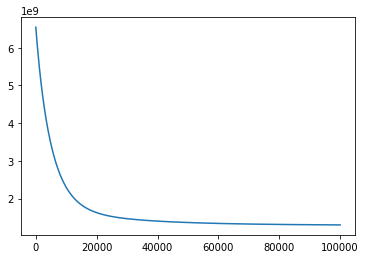

In [72]:
plt.plot(J_storage)

Removing GDP Per capita as it is a static feature

In [89]:
# Extract feature and target

feature_column = [
       'Population Density/km2 (X2)', 'Vaccination rate per 100 (X3)',
       'Doctor population per 1000 (X4)', 'Hospital beds per 1000 (X5)',
       'Life Expentancy (X6)', 'Average Temperature (X7)', 'Active Cases (X8)']

# get features and targets from data frame
df_feature, df_target = get_features_targets(df,feature_column,["Deaths over X-period (Y)"])
df_features = poly_features(df_feature, 'Doctor population per 1000 (X4)', 'Doctor population per 1000 (X4)',2)
df_features = poly_features(df_feature, 'Population Density/km2 (X2)', 'Population Density/km2 (X2)',3)
df_features = poly_features(df_feature, 'Vaccination rate per 100 (X3)', 'Vaccination rate per 100 (X3)',3)


# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.25)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train_z) # concatenating for the y intercept
target = prepare_target(df_target_train)

iterations = 100000
alpha = 0.0001

num_rows = X.shape[0] #Number of Rows
num_cols = X.shape[1] #Number of Columns 
beta = np.random.randn(num_cols,1) / np.sqrt(num_rows) #Weight Initialization

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
df_feature_test_z = normalize_z(df_feature_test)
pred = predict(df_feature_test_z,beta)
print(beta)

evaluate_model(df_target_test, pred)

[[ 66307.19103795]
 [ -4375.03191849]
 [-15492.41980797]
 [ 12686.68873763]
 [  1407.15115414]
 [  5339.61687194]
 [ 18037.04697146]
 [ 78124.24620235]]
mse :                                      0
Deaths over X-period (Y)  1.703125e+09

r2 : Deaths over X-period (Y)    0.864502
dtype: float64
adjusted r2 : Deaths over X-period (Y)    0.847565
dtype: float64


/tmp/ipykernel_6476/96265623.py:68: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  mse = np.matmul(error.T,error)/n


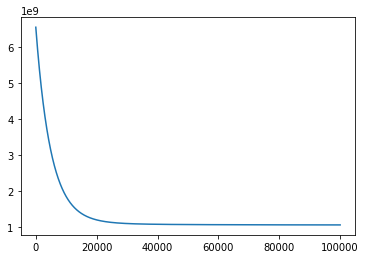

In [74]:
plt.plot(J_storage)

#### Testing out polynomial faetures on other features

In [81]:
# Extract feature and target

feature_column = [
       'Population Density/km2 (X2)', 'Vaccination rate per 100 (X3)',
       'Doctor population per 1000 (X4)', 'Hospital beds per 1000 (X5)',
       'Life Expentancy (X6)', 'Average Temperature (X7)', 'Active Cases (X8)']

# get features and targets from data frame
df_feature, df_target = get_features_targets(df,feature_column,["Deaths over X-period (Y)"])
df_features = poly_features(df_feature, 'Doctor population per 1000 (X4)', 'Doctor population per 1000 (X4)',2)


# split the data into training and test data sets
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(df_feature, df_target, random_state=100, test_size=0.25)

# normalize the feature using z normalization
df_feature_train_z = normalize_z(df_feature_train)

X = prepare_feature(df_feature_train_z) # concatenating for the y intercept
target = prepare_target(df_target_train)

iterations = 100000
alpha = 0.0001

num_rows = X.shape[0] #Number of Rows
num_cols = X.shape[1] #Number of Columns 
beta = np.random.randn(num_cols,1) / np.sqrt(num_rows) #Weight Initialization

# call the gradient_descent function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)

# call the predict method to get the predicted values
df_feature_test_z = normalize_z(df_feature_test)
pred = predict(df_feature_test_z,beta)
print(beta)

evaluate_model(df_target_test, pred)

[[66307.19103795]
 [-8189.63880935]
 [-9391.59575791]
 [13118.35869515]
 [  624.40272439]
 [ 4318.96181365]
 [16022.58882822]
 [79836.65546983]]
mse :                                      0
Deaths over X-period (Y)  1.459203e+09

r2 : Deaths over X-period (Y)    0.883908
dtype: float64
adjusted r2 : Deaths over X-period (Y)    0.869397
dtype: float64


/tmp/ipykernel_6476/96265623.py:68: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  mse = np.matmul(error.T,error)/n


Using Min Max Norm

In [ ]:
# Normalize dataset
# df_norm = normalize_z(df)

# normalize features
df_features = normalize_minmax(df_features)

# Extract feature and target
df_feature, df_target = get_features_targets(df,["Still Hospitalised","7 days Moving Average","Percentage Vaccinated"],["STI Price"])



# split data using random_state = 100 and 30% test size
df_features_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

# change to numpy array and append column for feature
X = prepare_feature(df_features_train) # concatenating for the y intercept
target = prepare_target(df_target_train)


iterations = 10000
alpha = 0.01
num_rows = X.shape[0] #Number of Rows
num_cols = X.shape[1] #Number of Columns 
beta = np.random.randn(num_cols,1) / np.sqrt(num_rows) #Weight Initialization

# call gradient_descent() function
beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)
pred = predict(df_features_test,beta)

evaluate_model(df_target_test, pred)